In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
df = pd.read_csv('scraped_data.csv')

In [129]:
print("Number of Reviews:", len(df))
print("Average Rating:", df['Rating'].mean())
print("Median Rating:", df['Rating'].median())
print("Standard Deviation of Ratings:", df['Rating'].std())
print("Variance of Ratings:", df['Rating'].var())
print("Minimum Rating:", df['Rating'].min())
print("Maximum Rating:", df['Rating'].max())
print("\nSummary Statistics:")
print(df['Rating'].describe())

Number of Reviews: 19821
Average Rating: 6.883810100398567
Median Rating: 7.0
Standard Deviation of Ratings: 1.8335836479438177
Variance of Ratings: 3.3620289940069576
Minimum Rating: 1
Maximum Rating: 10

Summary Statistics:
count    19821.000000
mean         6.883810
std          1.833584
min          1.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: Rating, dtype: float64


In [130]:
df.isnull().sum()

RumName         0
Rating          0
OpinionTitle    4
Opinion         0
dtype: int64

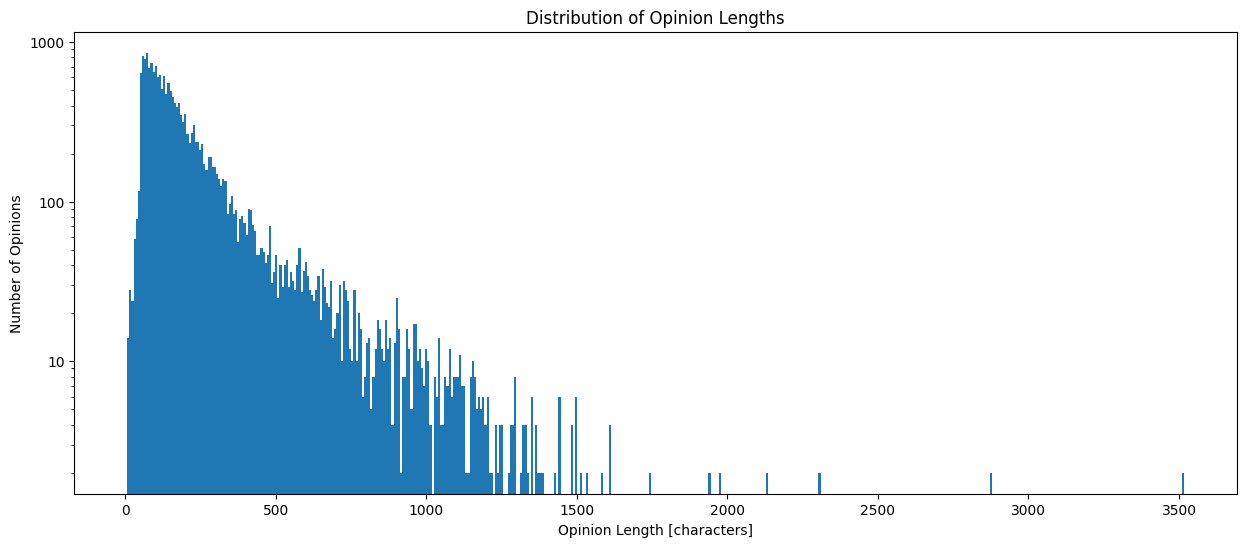

In [131]:
df['OpinionLength'] = df['Opinion'].apply(len)
opinion_lengths = df['OpinionLength'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
plt.hist(opinion_lengths.index, weights=opinion_lengths.values, bins=500)
plt.xlabel('Opinion Length [characters]')
plt.ylabel('Number of Opinions')
plt.title('Distribution of Opinion Lengths')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

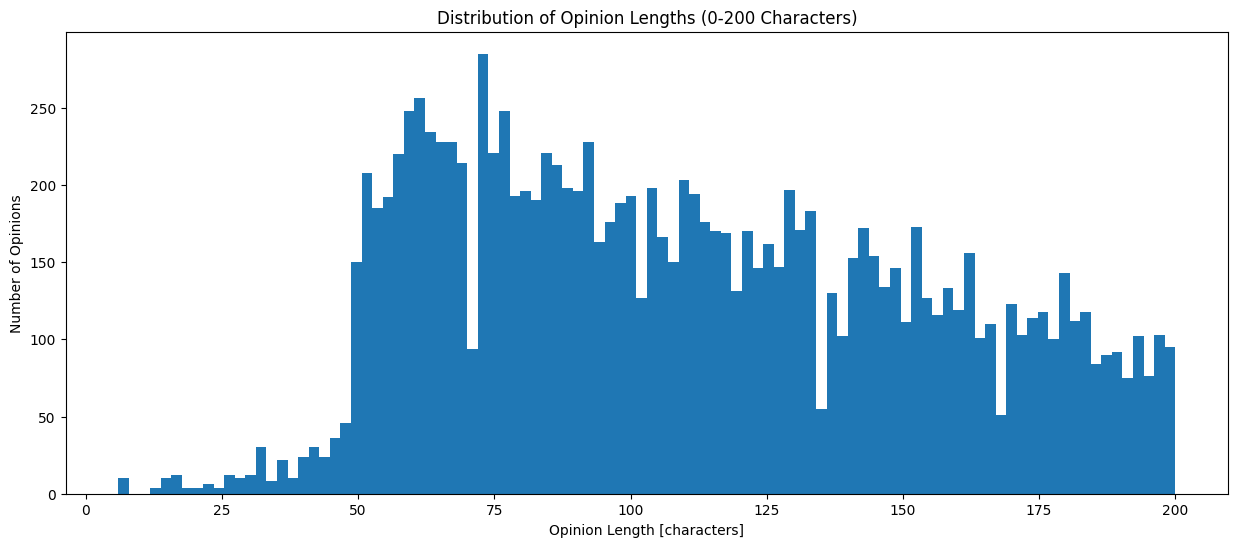

In [132]:
df['OpinionLength'] = df['Opinion'].apply(len)
filtered_df = df[df['OpinionLength'] <= 200]
opinion_lengths = filtered_df['OpinionLength'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
plt.hist(opinion_lengths.index, weights=opinion_lengths.values, bins=100)
plt.xlabel('Opinion Length [characters]')
plt.ylabel('Number of Opinions')
plt.title('Distribution of Opinion Lengths (0-200 Characters)')
plt.show()

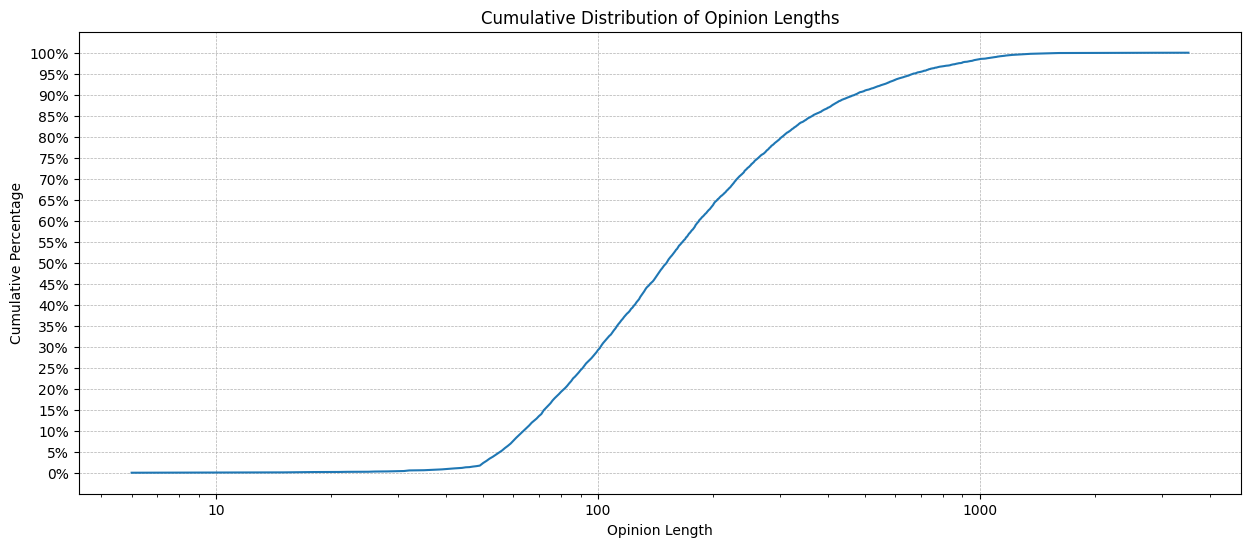

In [133]:
df['OpinionLength'] = df['Opinion'].apply(len)
opinion_lengths = df['OpinionLength'].value_counts().sort_index()
cumulative_counts = opinion_lengths.cumsum()
total_opinions = len(df)
cumulative_percentage = (cumulative_counts / total_opinions) * 100

plt.figure(figsize=(15, 6))
plt.plot(opinion_lengths.index, cumulative_percentage)
plt.xlabel('Opinion Length')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Distribution of Opinion Lengths')

plt.yticks(np.arange(0, 101, 5))
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f%%'))
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [134]:
df = pd.read_csv("scraped_data.csv")
df = df[(df['Opinion'].str.len() >= 60) & (df['OpinionTitle'].notnull())]
df.to_csv("processed_data.csv", index=False)
df.isnull().sum()

RumName         0
Rating          0
OpinionTitle    0
Opinion         0
dtype: int64

6.98% of the dataset has been removed due to length requirement of 60 characters or having no title (4 of them).

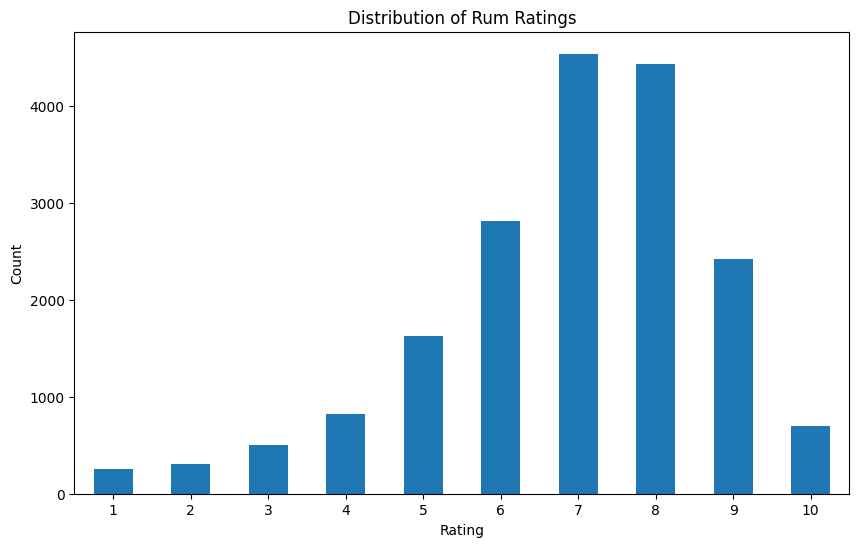

In [135]:
bins = range(11)
rating_counts = df.groupby('Rating').size()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', rot=0)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rum Ratings')
plt.show()

In [136]:
df['RumName'].value_counts().head(20)

RumName
Diplomatico Reserva Exclusiva            260
Plantation XO 20th Anniversary           236
Bumbu Original                           200
Kraken Black Spiced                      184
Ron Zacapa 23 Solera                     172
El Dorado 12-Year                         96
Havana Club 7-Year                        94
Bumbu XO                                  84
Flor de Caña 12-Year                      82
Appleton Estate Rare Casks 12-Year        80
Plantation Barbados 5-Year                78
Plantation 3 Stars Artisanal              78
Dos Maderas PX 5+5                        74
Pampero Aniversario Reserva Exclusiva     70
Brugal 1888                               70
Barcelo Imperial                          70
Diplomatico Mantuano                      66
Matusalem Gran Reserva 15-Year            66
Doorly's XO 6-Year                        66
Santa Teresa 1796                         64
Name: count, dtype: int64

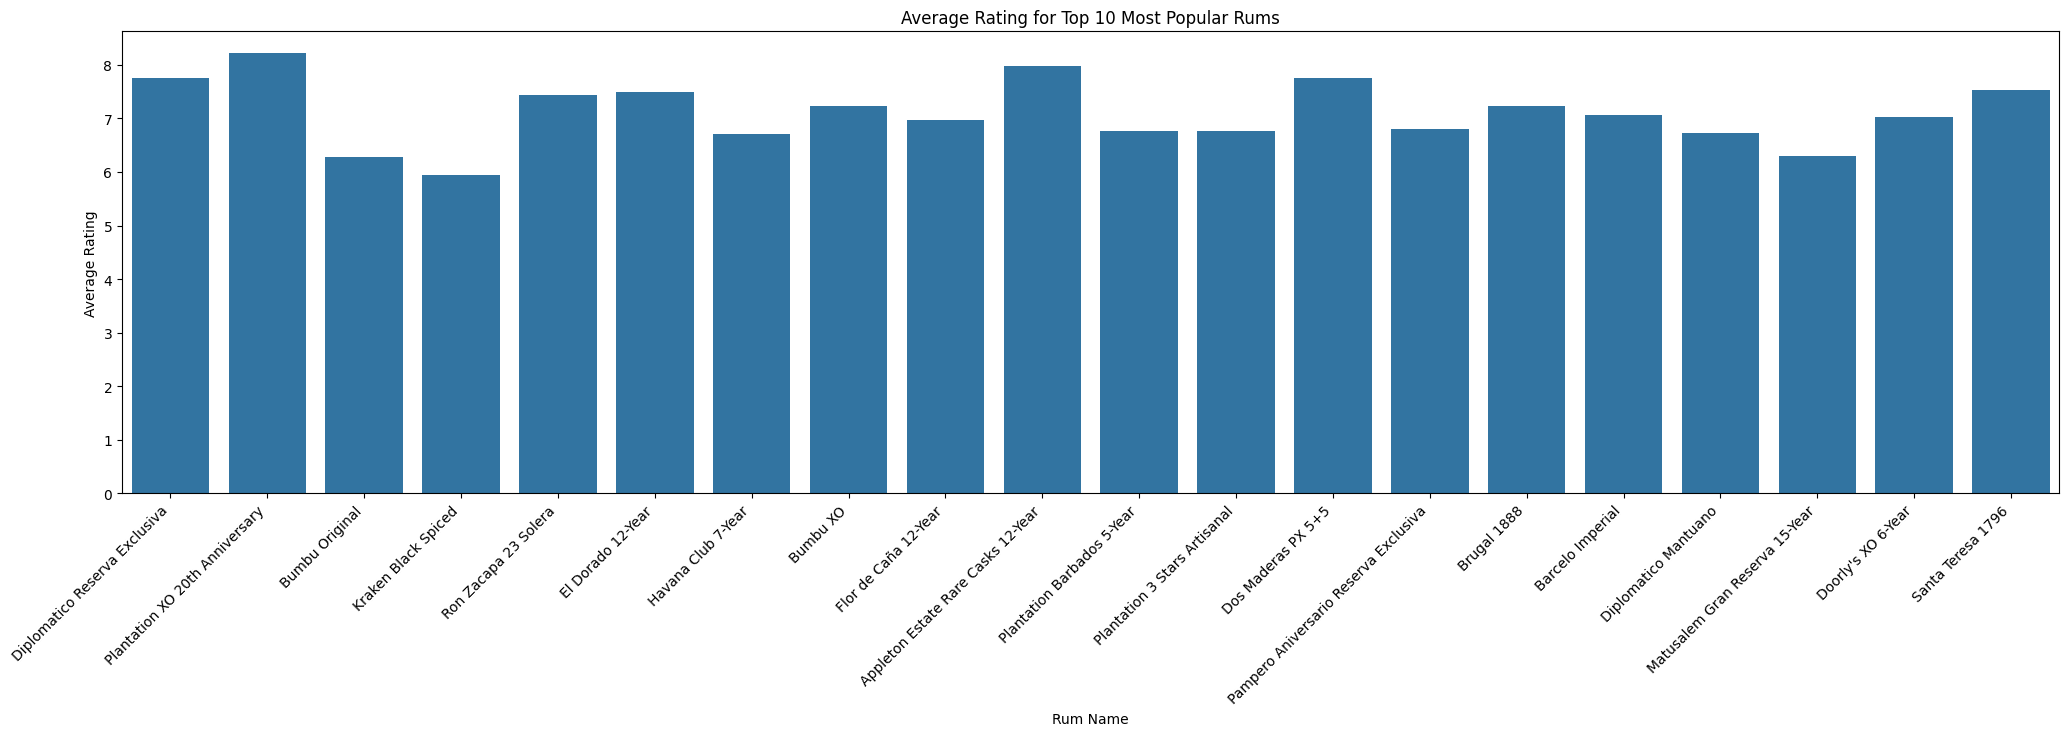

In [137]:
rum_counts = df['RumName'].value_counts()
top_10_rums = rum_counts.head(20).index.tolist()
filtered_df = df[df['RumName'].isin(top_10_rums)]
grouped_df = filtered_df.groupby('RumName')['Rating'].mean().reset_index()
grouped_df = grouped_df.set_index('RumName').loc[top_10_rums].reset_index()

plt.figure(figsize=(25, 6))
sns.barplot(x='RumName', y='Rating', data=grouped_df)
plt.title('Average Rating for Top 10 Most Popular Rums')
plt.xlabel('Rum Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\creep\AppData\Local\Temp\ipykernel_30216\570373327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RumName', y='Rating', data=filtered_df, palette='viridis')


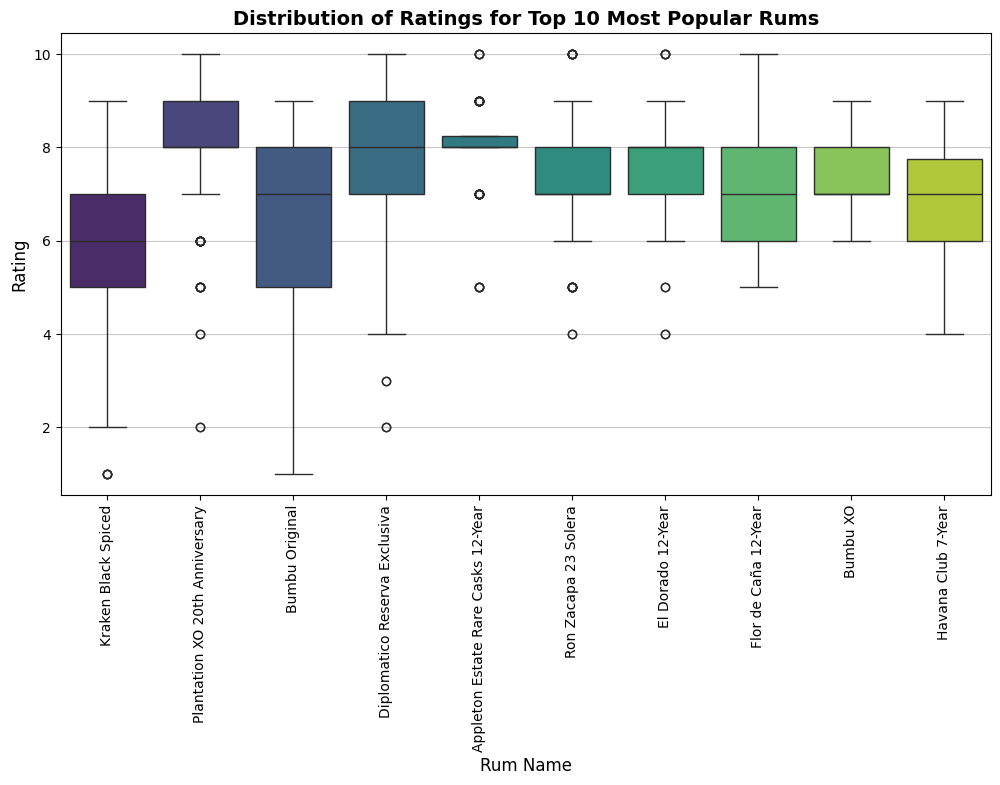

In [148]:
rum_counts = df['RumName'].value_counts()
top_10_rums = rum_counts.head(10).index.tolist()
filtered_df = df[df['RumName'].isin(top_10_rums)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='RumName', y='Rating', data=filtered_df, palette='viridis')
plt.title('Distribution of Ratings for Top 10 Most Popular Rums', fontsize=14, fontweight='bold')
plt.xlabel('Rum Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.7)

plt.show()

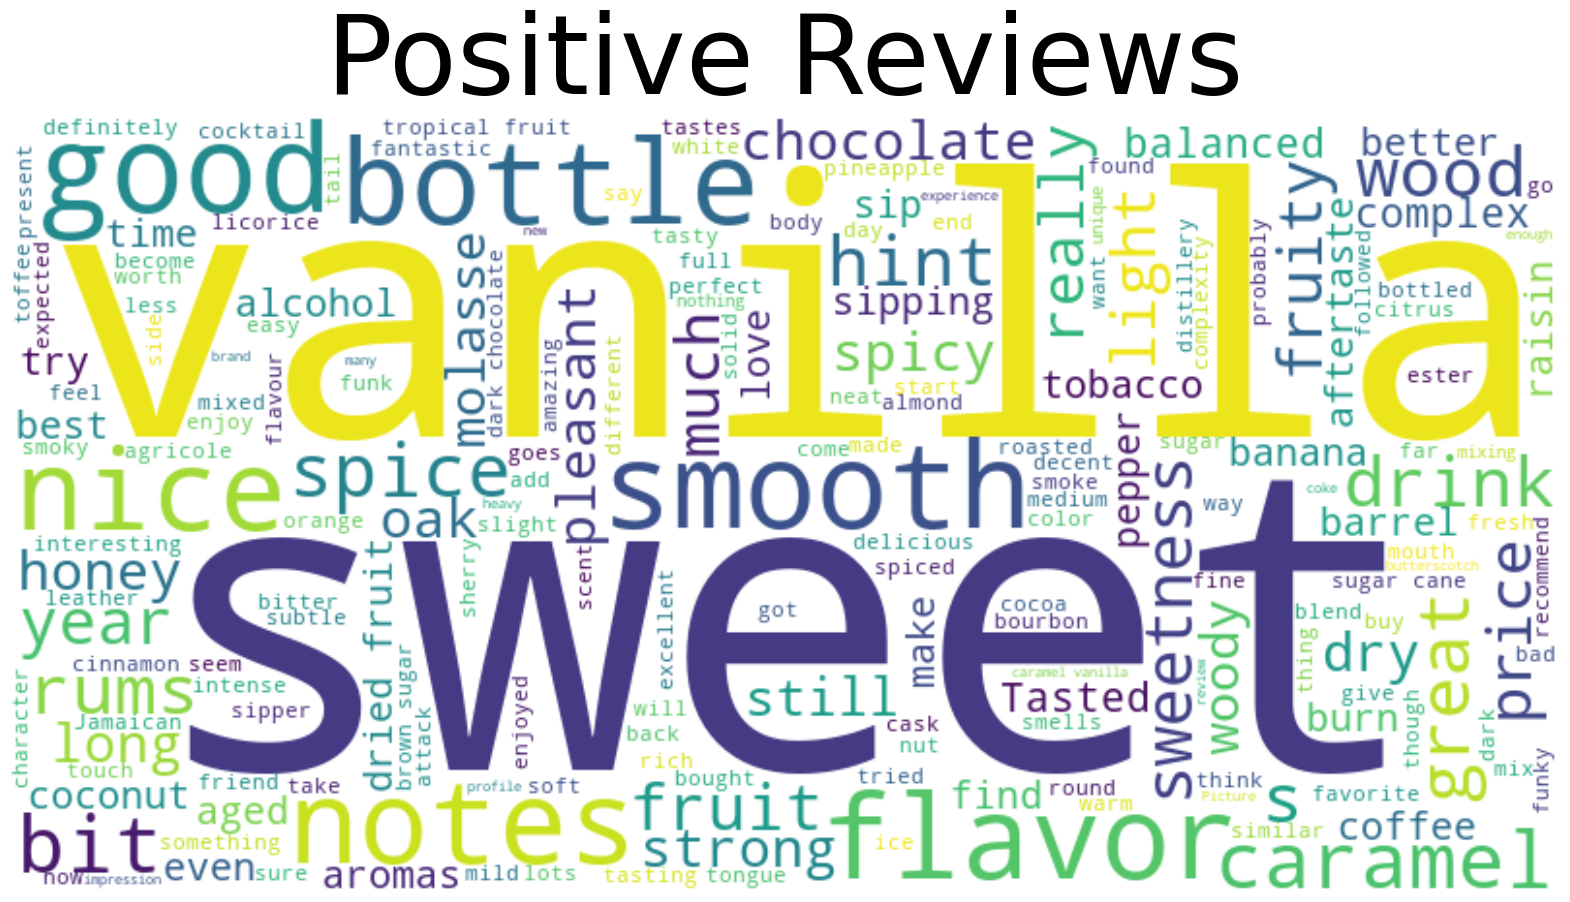

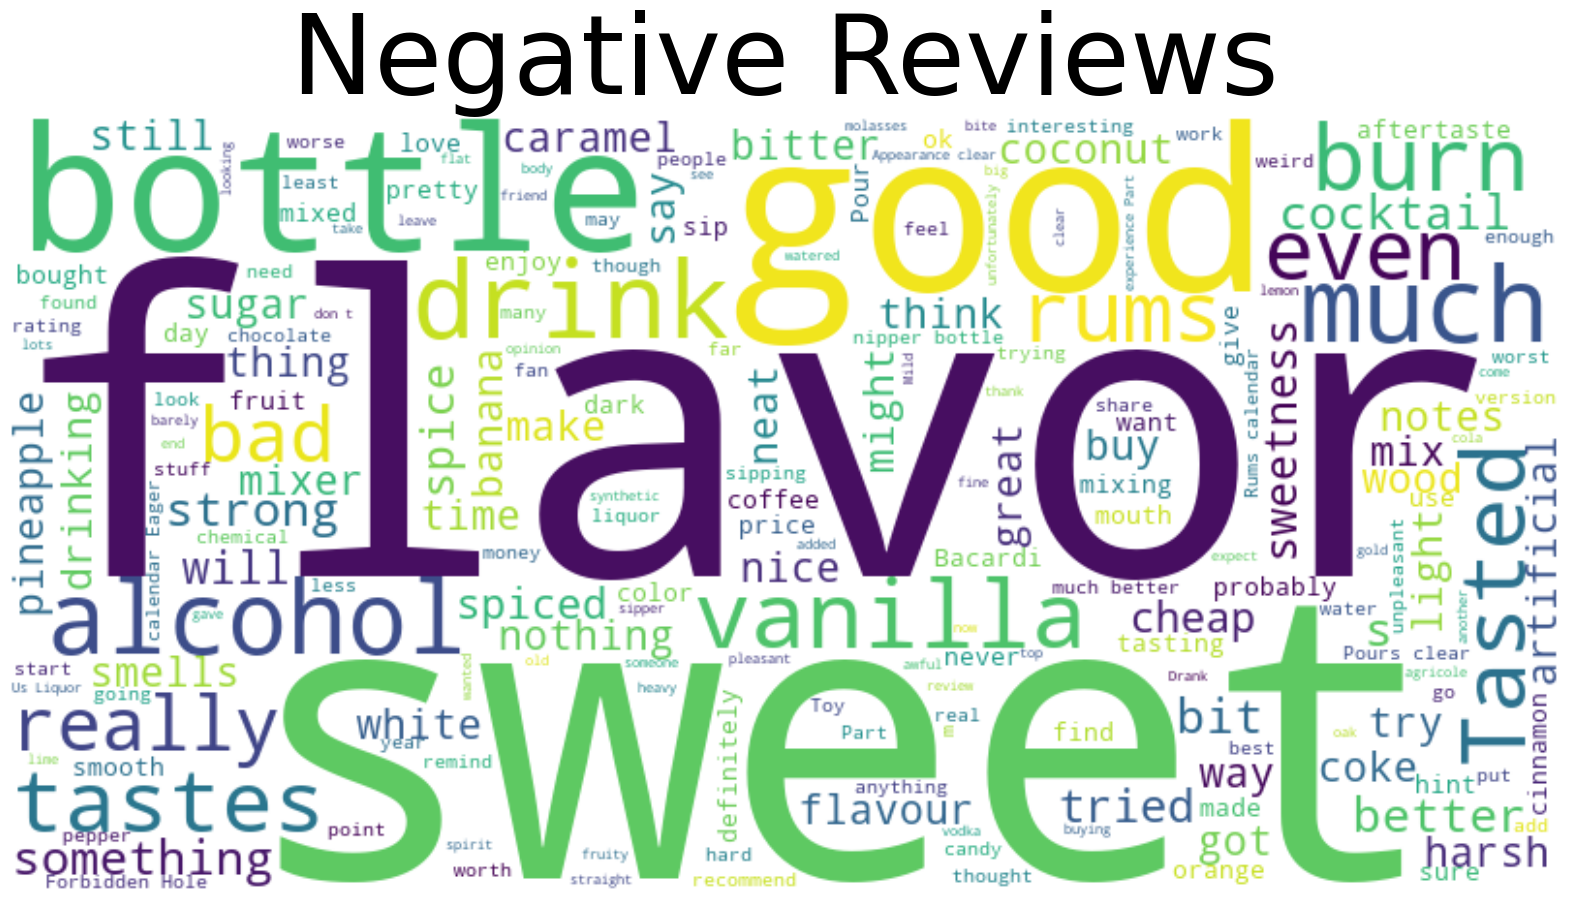

In [147]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['taste', 'rum', 'aroma', 'nose', 'note', 'little', 
                         'quite', 'palate', 'smell', 'finish', 'one', 'slightly', 
                         'rather', 'glass', 'overall', 'abv', 'first', 'second', 
                         'lot', 'maybe', 'know', 'almost', 'without', 'well'])

positive_reviews = df[df['Rating'] >= 7]['Opinion']
negative_reviews = df[df['Rating'] <= 4]['Opinion']

plt.figure(figsize=(20, 20))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(' '.join(positive_reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews', fontsize=80)
plt.show()

plt.figure(figsize=(20, 20))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(' '.join(negative_reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews', fontsize=80)

plt.show()

C:\Users\creep\AppData\Local\Temp\ipykernel_30216\1235420621.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


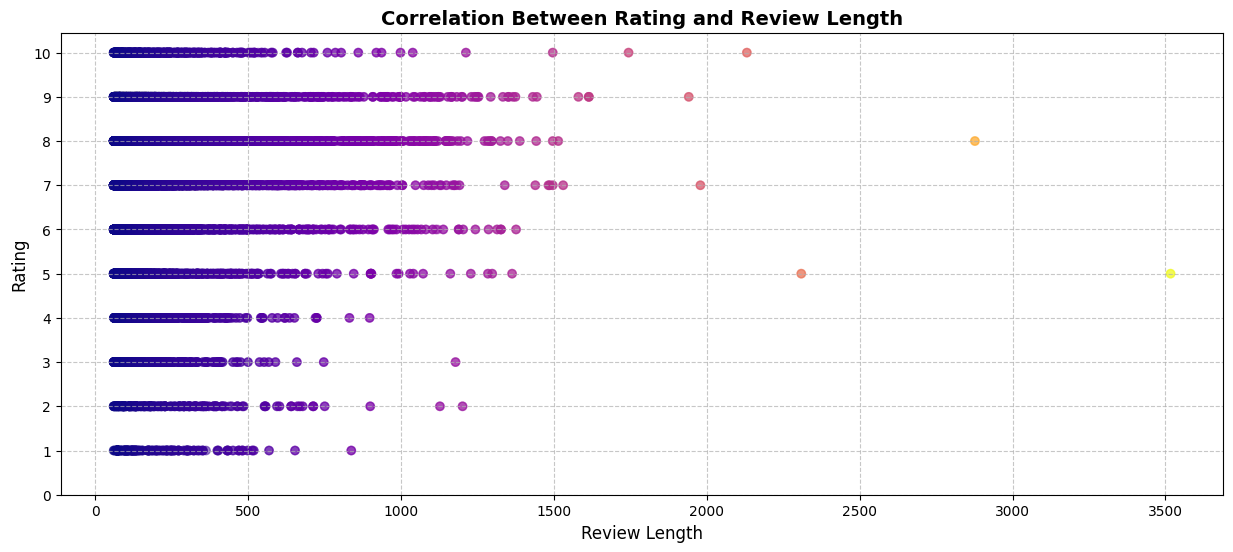

In [140]:
import matplotlib.cm as cm
df['ReviewLength'] = df['Opinion'].apply(len)
normalized_lengths = (df['ReviewLength'] - df['ReviewLength'].min()) / (df['ReviewLength'].max() - df['ReviewLength'].min())
cmap = cm.get_cmap('plasma')
plt.figure(figsize=(15, 6))
plt.scatter(df['ReviewLength'], df['Rating'], c=df['ReviewLength'], cmap=cmap, alpha=0.5)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Correlation Between Rating and Review Length', fontsize=14, fontweight='bold')
plt.yticks(range(11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()